<h1 style="text-align:center">Rotating Imbalance</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/RotatingImbalance.png" alt="A Mass-Spring-Damper System with a Rotating Imbalance" width=35%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System with a Rotating Imbalance </strong>
</p>

This notebook simluates the frequency response of simple mass-spring-damper system with a rotating imblanace, like the one shown in Figure 1.

The equation of motion for the system is:

$ \quad \left(m_1 + m_2\right) \ddot{x} + c \dot{x} + kx = m_2 e \omega^2 \cos{\omega t} $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$, by dividing by $(m_1 + m_2)$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = e \beta \omega^2 \cos{\omega t}$.

where

$ \quad \beta = \frac{m_2}{m_1 + m_2} $, $ \quad \omega_n^2 = \frac{k}{m_1 + m_2} $, and $ \quad 2 \zeta \omega_n = \frac{c}{m_1 + m_2}$.    

We can then write the response as:

$ \quad x(t) = \frac{e \beta \omega^2}{\sqrt{\left(\omega_n^2 - \omega^2\right)^2 + \left(2 \zeta \omega \omega_n \right)^2}} \cos{\left(\omega t - \phi\right)}$

where

$ \quad \phi = \tan^{-1}\left(\frac{2 \zeta \omega \omega_n}{\omega_n^2 - \omega^2}\right) $


For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Define the system pararmeters
k = 2*(2*np.pi)**2            # Spring constant (N/m)
m1 = 1.75                     # Sprung/main mass (kg)
m2 = 0.25                     # rotating mass (kg)
b = m2/(m1 + m2)              # mass ratio    
wn = np.sqrt(k/(m1 + m2))     # natural frequency (rad/s)
l = 0.1                       # Eccentricity


z = 0.1                       # Damping Ratio
c = 2*z*wn*(m1 + m2)          # Select c based on desired amping ratio

In [4]:
# Set up the frequency range
w = np.linspace(0,5*wn,2000)            # Freq range, 0-5*wn with 2000 points in-between

# Look at undamped case
z = 0.0
x_mag_un = (l*b*w**2)/np.sqrt((wn**2-w**2)**2+(2*z*w*wn)**2)

# Look at z=0.1
z = 0.1
x_mag_0p1 = (l*b*w**2)/np.sqrt((wn**2-w**2)**2+(2*z*w*wn)**2)

# Look at z=0.2
z = 0.2
x_mag_0p2 = (l*b*w**2)/np.sqrt((wn**2-w**2)**2+(2*z*w*wn)**2)

# Look at z=0.4
z = 0.4
x_mag_0p4 = (l*b*w**2)/np.sqrt((wn**2-w**2)**2+(2*z*w*wn)**2)


w = w/wn # Scale frequency so the plot is normalized by the natural frequency

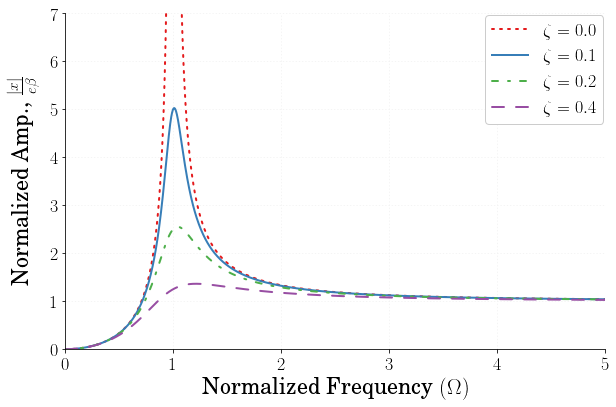

In [5]:
# Let's plot the magnitude of the frequency response

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.95')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $(\Omega)$',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Normalized Amp., $\frac{|x|}{e \beta}$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,x_mag_un/(l*b),  linewidth=2, linestyle = ':',  label=r'$\zeta = 0.0$')
plt.plot(w,x_mag_0p1/(l*b), linewidth=2, linestyle = '-',  label=r'$\zeta = 0.1$')
plt.plot(w,x_mag_0p2/(l*b), linewidth=2, linestyle = '-.', label=r'$\zeta = 0.2$')
plt.plot(w,x_mag_0p4/(l*b), linewidth=2, linestyle = '--', label=r'$\zeta = 0.4$')

plt.xlim(0,5)
plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)


# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('RotatingImbalance_Freq_Resp_mag.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [6]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))